<h1>The Battle of the Neighborhoods!</h1>
<h2>Determining the best location for a Business start-up in the city of Calgary, AB Canada</h2> 
<hr></hr>
<h3>An IBM Capstone Project</h3>
<h4>Author: Karim Khan</h4>
<h4>March 2020</h4> 

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data Used](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

Starting a new business is a big decision to make as it requires in-depth planning and execution. This project attempts to map out, segment and explore the neighborhoods in the city of Calgary, AB Canada. The goal will be to help entrepreneurs and prospective business owners in this city decide optimum locations to start a new business. Several factors will govern location selection such as the type of business, target customer base, population density and proximity to public transit, to name a few.

## Data Used <a name="data"></a>

A number of datasets and tools will be exploited to tackle the subject. To start off, a comprehensive list <b>[1]</b> showing the breakdown of the neighborhoods, their physical size and population across Calgary will be scraped and structured into a Pandas Data Frame. Next, geospatial information (latitude and longitude) will be extracted using geocoder package in Python for each neighborhood. Foursquare location data will be the main API server leveraged to explore the different venues and types of businesses that currently exist in those neighborhoods. A number of data science skills will be utilized in this project, such as data wrangling, exploratory data analysis and use of Machine Learning, namely K-Means Clustering algorithm to cluster and analyze the neighborhoods and help in selecting the best location for a business start-up.  

<b>[1]</b> - [City of Calgary's Open Data Portal](https://data.calgary.ca/Demographics/Census-by-Community-2019/rkfr-buzb/data)
<hr></hr>

In [9]:
#import libraries
import pandas as pd #main data structure library in Python
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np #main scientific library in Python

import requests

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from pandas.io.json import json_normalize # transform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

import folium # map rendering library

# import k-means clustering algorithm
from sklearn.cluster import KMeans

# install wordcloud
from wordcloud import WordCloud, STOPWORDS

print("imported libraries successfully!")

imported libraries successfully!


In [10]:
#Load the Census data, categorized by community, from the City of Calgary website issued on Dec 2019.
calgary_df=pd.read_csv('https://data.calgary.ca/api/views/rkfr-buzb/rows.csv?accessType=DOWNLOAD&bom=true&format=true')
calgary_df.to_csv('calgary_2019.csv', index=False) #write data into csv file.

In [11]:
calgary_df.head(1) #display raw data in pandas dataframe.

,CLASS,CLASS_CODE,COMM_CODE,NAME,SECTOR,SRG,COMM_STRUCTURE,CNSS_YR,FOIP_IND,RES_CNT,DWELL_CNT,PRSCH_CHLD,ELECT_CNT,EMPLYD_CNT,OWNSHP_CNT,DOG_CNT,CAT_CNT,PUB_SCH,SEP_SCH,PUBSEP_SCH,OTHER_SCH,UNKNWN_SCH,SING_FAMLY,DUPLEX,MULTI_PLEX,APARTMENT,TOWN_HOUSE,MANUF_HOME,CONV_STRUC,COMUNL_HSE,RES_COMM,OTHER_RES,NURSING_HM,OTHER_INST,HOTEL_CNT,OTHER_MISC,APT_NO_RES,APT_OCCPD,APT_OWNED,APT_PERSON,APT_VACANT,APT_UC,APT_NA,CNV_NO_RES,CNV_OCCPD,CNV_OWNED,CNV_PERSON,CNV_VACANT,CNV_UC,CNV_NA,DUP_NO_RES,DUP_OCCPD,DUP_OWNED,DUP_PERSON,DUP_VACANT,DUP_UC,DUP_NA,MFH_NO_RES,MFH_OCCPD,MFH_OWNED,MFH_PERSON,MFH_VACANT,MFH_UC,MFH_NA,MUL_NO_RES,MUL_OCCPD,MUL_OWNED,MUL_PERSON,MUL_VACANT,MUL_UC,MUL_NA,OTH_NO_RES,OTH_OCCPD,OTH_OWNED,OTH_PERSON,OTH_VACANT,OTH_UC,OTH_NA,TWN_NO_RES,TWN_OCCPD,TWN_OWNED,TWN_PERSON,TWN_VACANT,TWN_UC,TWN_NA,SF_NO_RES,SF_OCCPD,SF_OWNED,SF_PERSON,SF_VACANT,SF_UC,SF_NA,OTH_STRTY,DWELSZ_1,DWELSZ_2,DWELSZ_3,DWELSZ_4_5,DWELSZ_6,MALE_CNT,FEMALE_CNT,MALE_0_4,MALE_5_14,MALE_15_19,MALE_20_24,MALE_25_34,MALE_35_44,MALE_45_54,MALE_55_64,MALE_65_74,MALE_75,FEM_0_4,FEM_5_14,FEM_15_19,FEM_20_24,FEM_25_34,FEM_35_44,FEM_45_54,FEM_55_64,FEM_65_74,FEM_75,MF_0_4,MF_5_14,MF_15_19,MF_20_24,MF_25_34,MF_35_44,MF_45_54,MF_55_64,MF_65_74,MF_75,OTHER_CNT,OTHER_0_4,OTHER_5_14,OTHER_15_19,OTHER_20_24,OTHER_25_34,OTHER_35_44,OTHER_45_54,OTHER_55_64,OTHER_65_74,OTHER_75,multipolygon
0,Residential,1,LEG,LEGACY,SOUTH,DEVELOPING,BUILDING OUT,2019,NaN,"6,420","2,766",850,0,0,"1,826",0,0,"1,071",506,175,107,907,"1,081",356,14,"1,004",311,0,0,0,0,0,0,0,0,0,8,909,394,"1,759",83,2,2,0,0,0,0,0,0,0,0,343,308,944,8,3,1,0,0,0,0,0,0,0,0,12,9,25,2,0,0,0,0,0,0,0,0,0,2,258,222,660,7,44,0,19,949,893,"3,032",46,65,2,0,460,945,459,556,48,"3,125","3,283",330,387,171,212,708,604,369,196,111,37,356,375,153,206,810,600,355,250,141,37,686,762,324,418,"1,518","1,204",724,446,252,74,0,0,0,0,0,0,0,0,0,0,0,MULTIPOLYGON (((-114.021996041091 50.863078904...


As you can notice, the raw data provides a comprehensive dataset on each of the communities (which will be referred to as neighborhoods from this point on) in Calgary. For the intents and purposes of this study, we will select the most significant features from this data set that will help answer our question. Definition of each of these feature sets will be provided below following this data cleaning step.

In [12]:
calgary_df = calgary_df[['CLASS', 'NAME', 'SECTOR', 'SRG', 'CNSS_YR', 'RES_CNT', 'DWELL_CNT', 'MALE_CNT', 'FEMALE_CNT']]
calgary_df.head()

,CLASS,NAME,SECTOR,SRG,CNSS_YR,RES_CNT,DWELL_CNT,MALE_CNT,FEMALE_CNT
0,Residential,LEGACY,SOUTH,DEVELOPING,2019,"6,420","2,766","3,125","3,283"
1,Residential,HIGHLAND PARK,CENTRE,BUILT-OUT,2019,"3,838","2,277","1,986","1,846"
2,Residential,CORNERSTONE,NORTHEAST,DEVELOPING,2019,"2,648","1,285","1,409","1,225"
3,Residential,MONTGOMERY,NORTHWEST,BUILT-OUT,2019,"4,515","2,013","2,216","2,291"
4,Residential,TEMPLE,NORTHEAST,BUILT-OUT,2019,"10,977","3,733","5,597","5,357"


In [13]:
calgary_df.rename(columns={'CLASS':'Class', 'NAME':'Neighborhood', 'SECTOR':'Sector', 'SRG':'Suburban Residential Growth', 
                           'CNSS_YR':'Census', 'RES_CNT':'Population', 'DWELL_CNT':'Dwellings',
                          'MALE_CNT':'Total Male Residents', 'FEMALE_CNT':'Total Female Residents'}, inplace=True)
calgary_df.head()

,Class,Neighborhood,Sector,Suburban Residential Growth,Census,Population,Dwellings,Total Male Residents,Total Female Residents
0,Residential,LEGACY,SOUTH,DEVELOPING,2019,"6,420","2,766","3,125","3,283"
1,Residential,HIGHLAND PARK,CENTRE,BUILT-OUT,2019,"3,838","2,277","1,986","1,846"
2,Residential,CORNERSTONE,NORTHEAST,DEVELOPING,2019,"2,648","1,285","1,409","1,225"
3,Residential,MONTGOMERY,NORTHWEST,BUILT-OUT,2019,"4,515","2,013","2,216","2,291"
4,Residential,TEMPLE,NORTHEAST,BUILT-OUT,2019,"10,977","3,733","5,597","5,357"


The preceding blocks of code walks you through the features selected from the raw data set. The columns have been renamed to offer a better understanding of each column, which are:

* <b>Class</b> - Indicates the category of the neighborhood, which are Residential, Industrial, Residual Sub Areas and Recreational Parks.
* <b>Neighborhood</b> - Indicates name of the community.
* <b>Sector</b> - Indicates the high-level geographical location of the neighborhood (This will become especially important later on in the analysis).
* <b>Suburban Residential Growth</b> - Reflects the yearly development capacity or or housing supply, categorized as Built-Out (i.e. Fully Developed neighborhoods), Developing (neighborhoods still under development) and non-residential.
* <b>Census</b> - Indicates the year the data was collected.
* <b>Population</b> - Indicates the total population per neighborhood.
* <b>Dwellings</b> - Refers to the number of living quarters in which a person/family resides <b>[2]</b>.
* <b>Total Male Residents</b> - Shows the total number of male residents per neighborhood.
* <b>Total Female Residents</b> - Shows the total number of male residents per neighborhood.

<b>[2]</b> - [Statistics Canada](https://www23.statcan.gc.ca/imdb/p3Var.pl?Function=DEC&Id=323163)
<hr></hr>

<h3>Data Wrangling</h3>

In [14]:
#Cast data types from strings to integer for data manipulation.
calgary_df["Population"] = calgary_df["Population"].str.replace(",","").astype(int)
calgary_df["Dwellings"] = calgary_df["Dwellings"].str.replace(",","").astype(int)
calgary_df["Total Male Residents"] = calgary_df["Total Male Residents"].str.replace(",","").astype(int)
calgary_df["Total Female Residents"] = calgary_df["Total Female Residents"].str.replace(",","").astype(int)
calgary_df.head()

,Class,Neighborhood,Sector,Suburban Residential Growth,Census,Population,Dwellings,Total Male Residents,Total Female Residents
0,Residential,LEGACY,SOUTH,DEVELOPING,2019,6420,2766,3125,3283
1,Residential,HIGHLAND PARK,CENTRE,BUILT-OUT,2019,3838,2277,1986,1846
2,Residential,CORNERSTONE,NORTHEAST,DEVELOPING,2019,2648,1285,1409,1225
3,Residential,MONTGOMERY,NORTHWEST,BUILT-OUT,2019,4515,2013,2216,2291
4,Residential,TEMPLE,NORTHEAST,BUILT-OUT,2019,10977,3733,5597,5357


<h3>Query Geospatial coordinates (Latitudes/Longitudes) for each Neighborhood</h3>

The following blocks of code show the intermediate steps taken to obtain the latitude/longitude coordinates for each neighborhood using the [Geocoder](https://geocoder.readthedocs.io/) API location library package. It is worth noting that this package has a limited number of daily API requests that a user can make to call for data. So it is wise to mine the dataset once and save it to a CSV file to be casted into a pandas dataframe for convenience.

In [15]:
#Pull out neighborhood dataset and add it to a new list "neighborhoods". 
neighborhoods = []
for i in calgary_df['Neighborhood']:
    neighborhoods.append(i)
# neighborhoods

In [16]:
#Use geocoder to convert the neighborhood into latitude/longitude coordinates.
#Use only once to fetch lat/long coordinates of all neighborhoods in Calgary.
#Saved output to csv file (cgy_geospatial_coord.csv).
nb = []
lat = []
lng = []
for neighborhood in neighborhoods :
#     print(neighborhood)
    nbhd = neighborhood + ',' + ' Calgary, AB'
    print(nbhd)
    try:
        address = nbhd
        geolocator = Nominatim(user_agent="cgy_explorer")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
    except:
        latitude = None
        longitude = None
    print(latitude, longitude)

    lat.append(latitude)
    lng.append(longitude)

In [17]:
header= ['Neighborhood', 'Latitude', 'Longitude'] #create "header" column
create a new dataframe comprising neighborhood and coordinates.
cgy_spatial_df = pd.DataFrame(list(zip(neighborhoods, lat, lng)),columns=header) 
cgy_spatial_df.to_csv('cgy_geospatial_coord.csv', index=False) #write dataframe to CSV file
# cgy_spatial_df = pd.read_csv('cgy_geospatial_coord.csv') #load dataframe
cgy_spatial_df.head()

,Neighborhood,Latitude,Longitude
0,LEGACY,50.856893,-114.002560
1,HIGHLAND PARK,51.085355,-114.065809
2,CORNERSTONE,51.160280,-113.939608
3,MONTGOMERY,51.074802,-114.162474
4,TEMPLE,51.088424,-113.947877


Now that we have the geospatial coordinates for each neighborhood, let's append it into the main dataframe. 

In [18]:
calgary_df = calgary_df.sort_values('Neighborhood') #sort main df by neighborhood
cgy_spatial_df = cgy_spatial_df.sort_values('Neighborhood') #sort geospatial df by neighborhood
#print dimensions of both dfs (to ensure number of rows are consistent)
print(cgy_spatial_df.shape[0]) 
print(calgary_df.shape[0])

306
306


There are a total of <b>306</b> distinct neighborhoods in the city of Calgary.

In [19]:
#Add lat/long coordinates into main df "calgary_df"
calgary_df['Latitude'] = cgy_spatial_df['Latitude'] 
calgary_df['Longitude'] = cgy_spatial_df['Longitude']
calgary_df

,Class,Neighborhood,Sector,Suburban Residential Growth,Census,Population,Dwellings,Total Male Residents,Total Female Residents,Latitude,Longitude
266,Residual Sub Area,01B,NORTHWEST,NaN,2019,0,0,0,0,53.431253,-113.493237
240,Residual Sub Area,01C,WEST,NaN,2019,0,0,0,0,53.431253,-113.493237
5,Residual Sub Area,01F,NORTHWEST,BUILT-OUT,2019,0,0,0,0,NaN,NaN
299,Residual Sub Area,01H,WEST,NaN,2019,0,0,0,0,NaN,NaN
77,Residual Sub Area,01I,WEST,NaN,2019,0,0,0,0,NaN,NaN
179,Residual Sub Area,01K,NORTHWEST,NaN,2019,0,0,0,0,NaN,NaN
213,Residual Sub Area,02B,NORTH,NaN,2019,0,0,0,0,53.431253,-113.493237
211,Residual Sub Area,02C,NORTH,NaN,2019,0,0,0,0,NaN,NaN
105,Residual Sub Area,02E,NORTHWEST,NaN,2019,0,0,0,0,NaN,NaN
233,Residual Sub Area,02F,NORTHWEST,NaN,2019,0,0,0,0,NaN,NaN


Now that the dataset is comprehensive, it is time to validate, manipulate and enrich the data as required. As you may notice, Residual Sub Areas were unrecognized by Geocoder and hence, no coordinates were found for them. It is safe to drop them since they do not have any residents. 

In [20]:
calgary_df.dropna(subset=["Latitude"], axis=0, inplace=True) #drop rows with no geospatial coordinates.
calgary_df.sort_values('Suburban Residential Growth') #sort df by development capacity.
calgary_df

,Class,Neighborhood,Sector,Suburban Residential Growth,Census,Population,Dwellings,Total Male Residents,Total Female Residents,Latitude,Longitude
266,Residual Sub Area,01B,NORTHWEST,NaN,2019,0,0,0,0,53.431253,-113.493237
240,Residual Sub Area,01C,WEST,NaN,2019,0,0,0,0,53.431253,-113.493237
213,Residual Sub Area,02B,NORTH,NaN,2019,0,0,0,0,53.431253,-113.493237
106,Residual Sub Area,06A,WEST,NaN,2019,0,0,0,0,53.431253,-113.493237
205,Residual Sub Area,06B,WEST,NaN,2019,0,0,0,0,53.431253,-113.493237
37,Residual Sub Area,10D,NORTHEAST,NaN,2019,0,0,0,0,53.431253,-113.493237
239,Residual Sub Area,10E,NORTHEAST,NaN,2019,0,0,0,0,53.431253,-113.493237
151,Residual Sub Area,12A,SOUTHEAST,NaN,2019,0,0,0,0,51.057934,-114.032672
79,Residual Sub Area,12B,SOUTHEAST,NaN,2019,0,0,0,0,53.431253,-113.493237
218,Residual Sub Area,12C,SOUTHEAST,NaN,2019,0,0,0,0,53.431253,-113.493237


Now that we dropped rows with missing coordinates and sorted the data, we can still notice the presence of Residual Sub Areas, but this time with missing "Suburban Residential Growth" data. This represents areas that have not yet been categorized by the City of Calgary. Similarly, it is safe to drop this data since no residents occupy those neighborhoods. 

In [21]:
calgary_df.dropna(subset = ['Suburban Residential Growth'], axis=0, inplace=True)
calgary_df

,Class,Neighborhood,Sector,Suburban Residential Growth,Census,Population,Dwellings,Total Male Residents,Total Female Residents,Latitude,Longitude
45,Residential,ABBEYDALE,NORTHEAST,BUILT-OUT,2019,5957,2069,3056,2895,51.058836,-113.929413
140,Residential,ACADIA,SOUTH,BUILT-OUT,2019,10520,5046,5310,5171,50.968655,-114.055587
9,Residential,ALBERT PARK/RADISSON HEIGHTS,EAST,BUILT-OUT,2019,6997,3010,3627,3360,51.044845,-113.990195
126,Residential,ALTADORE,CENTRE,BUILT-OUT,2019,6942,3285,3394,3535,51.015104,-114.100756
241,Residential,APPLEWOOD PARK,EAST,BUILT-OUT,2019,6981,2415,3540,3419,51.044658,-113.928930
51,Residential,ARBOUR LAKE,NORTHWEST,BUILT-OUT,2019,10619,3937,5168,5422,51.136786,-114.202355
23,Residential,ASPEN WOODS,WEST,DEVELOPING,2019,9446,3068,4650,4767,51.043119,-114.210185
39,Residential,AUBURN BAY,SOUTHEAST,DEVELOPING,2019,17607,6046,8722,8831,50.890605,-113.959565
253,Residential,BANFF TRAIL,CENTRE,BUILT-OUT,2019,4153,1949,2255,1845,51.071462,-114.111647
8,Residential,BANKVIEW,CENTRE,BUILT-OUT,2019,5256,3531,2686,2553,51.033887,-114.099518


In [22]:
calgary_df = calgary_df.sort_values('Population', ascending=False) #sort data by Population in descending order
calgary_df.reset_index(drop=True, inplace=True)
calgary_df

,Class,Neighborhood,Sector,Suburban Residential Growth,Census,Population,Dwellings,Total Male Residents,Total Female Residents,Latitude,Longitude
0,Residential,PANORAMA HILLS,NORTH,DEVELOPING,2019,25710,8199,12722,12758,51.160946,-114.081322
1,Residential,BELTLINE,CENTRE,BUILT-OUT,2019,25129,18308,13040,11302,51.040498,-114.072593
2,Residential,SADDLE RIDGE,NORTHEAST,DEVELOPING,2019,22321,6266,11203,11078,51.129706,-113.944796
3,Residential,EVERGREEN,SOUTH,DEVELOPING,2019,21500,7256,10530,10909,50.916379,-114.111578
4,Residential,CRANSTON,SOUTHEAST,DEVELOPING,2019,19884,7141,9874,9970,50.875210,-113.965956
5,Residential,TUSCANY,NORTHWEST,BUILT-OUT,2019,19884,6672,9775,10061,51.125380,-114.244843
6,Residential,TARADALE,NORTHEAST,DEVELOPING,2019,19026,5272,9914,9088,51.116704,-113.938464
7,Residential,MCKENZIE TOWNE,SOUTHEAST,DEVELOPING,2019,18283,7166,8995,9200,50.916499,-113.964353
8,Residential,EVANSTON,NORTH,DEVELOPING,2019,17685,5686,8747,8841,51.171292,-114.116352
9,Residential,COVENTRY HILLS,NORTH,BUILT-OUT,2019,17667,5595,8870,8664,51.163596,-114.056293


Sorting the resulting clean data by Population reveals communities that have little to no residents occupying them (rows 199 - 205 in above data frame). As an Entrepreneur, we will be interested in neighborhoods with significant population to start a new business venture. Therefore, it is safe to drop those neighborhoods since they have a low weight-factor in our analysis.  

In [23]:
calgary_df.drop(range(199,206), axis=0, inplace=True)
calgary_df.reset_index(drop=True, inplace=True)
calgary_df

,Class,Neighborhood,Sector,Suburban Residential Growth,Census,Population,Dwellings,Total Male Residents,Total Female Residents,Latitude,Longitude
0,Residential,PANORAMA HILLS,NORTH,DEVELOPING,2019,25710,8199,12722,12758,51.160946,-114.081322
1,Residential,BELTLINE,CENTRE,BUILT-OUT,2019,25129,18308,13040,11302,51.040498,-114.072593
2,Residential,SADDLE RIDGE,NORTHEAST,DEVELOPING,2019,22321,6266,11203,11078,51.129706,-113.944796
3,Residential,EVERGREEN,SOUTH,DEVELOPING,2019,21500,7256,10530,10909,50.916379,-114.111578
4,Residential,CRANSTON,SOUTHEAST,DEVELOPING,2019,19884,7141,9874,9970,50.875210,-113.965956
5,Residential,TUSCANY,NORTHWEST,BUILT-OUT,2019,19884,6672,9775,10061,51.125380,-114.244843
6,Residential,TARADALE,NORTHEAST,DEVELOPING,2019,19026,5272,9914,9088,51.116704,-113.938464
7,Residential,MCKENZIE TOWNE,SOUTHEAST,DEVELOPING,2019,18283,7166,8995,9200,50.916499,-113.964353
8,Residential,EVANSTON,NORTH,DEVELOPING,2019,17685,5686,8747,8841,51.171292,-114.116352
9,Residential,COVENTRY HILLS,NORTH,BUILT-OUT,2019,17667,5595,8870,8664,51.163596,-114.056293


Our final sorted dataset has been reduced from <b>306</b> total neighborhoods to <b>199</b> effectively populated neighborhoods valid for analysis. The next step is to create a map using [folium](https://python-visualization.github.io/folium/) library to display the neighborhoods' distribution in the city of Calgary.

In [24]:
address = 'Calgary, AB'
geolocator = Nominatim(user_agent="cgy_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print(latitude, longitude)

51.0534234 -114.0625892


In [25]:
# create map of Calgary using latitude and longitude values
map_calgary = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood, population, srg  in zip(calgary_df['Latitude'], calgary_df['Longitude'], 
                                           calgary_df['Neighborhood'], calgary_df['Population'],calgary_df['Suburban Residential Growth']):
    label = '{}, {}, {}'.format(neighborhood, population, srg)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='purple',
        fill=True,
        fill_color='purple',
        fill_opacity=0.7,
        parse_html=False).add_to(map_calgary)  
    
map_calgary

Now that we have successfully mapped out the neighborhoods. Let's split the data based on the <b>"Suburban Residential Growth"</b> feature (or yearly development capacity), to gain insight into the split of fully-developed and currently developing neighborhoods in the city. 

In [26]:
#distinguish between Developing and Built-out neighborhoods
calgary_df_dev = calgary_df[calgary_df['Suburban Residential Growth']=='DEVELOPING'].reset_index(drop=True)
calgary_df_dev.shape[0]

31

In [27]:
calgary_df_built = calgary_df[calgary_df['Suburban Residential Growth']=='BUILT-OUT'].reset_index(drop=True)
calgary_df_built.shape[0]

168

In [28]:
# create map of Calgary using latitude and longitude values
map_calgary_dev = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood, population, srg  in zip(calgary_df_dev['Latitude'], calgary_df_dev['Longitude'], 
                                           calgary_df_dev['Neighborhood'], calgary_df_dev['Population'],calgary_df_dev['Suburban Residential Growth']):
    label = '{}, {}, {}'.format(neighborhood, population, srg)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_calgary_dev)  
    
map_calgary_dev

In [29]:
# create map of Calgary using latitude and longitude values
map_calgary_built = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood, population, srg  in zip(calgary_df_built['Latitude'], calgary_df_built['Longitude'], 
                                           calgary_df_built['Neighborhood'], calgary_df_built['Population'],calgary_df_built['Suburban Residential Growth']):
    label = '{}, {}, {}'.format(neighborhood, population, srg)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        parse_html=False).add_to(map_calgary_built)  
    
map_calgary_built

## Methodology <a name="methodology"></a>

<p>There are a total of 31 developing neighborhoods, with potential of growth and 168 fully-developed neighborhoods in Calgary as of Dec 2019. As an Entrepreneur, it is intuitive to launch your new business, say a restaurant, supermarket or cafe, in a developing neighborhood since there is potential room for growth as more people move into those communities. To add, it will also be less capital-intensive since property developers will be in need of new business owners to establish the commercial footprint in such neighborhoods. This will lead to providing incentives that are otherwise non-existent in saturated neighborhoods.</p>

<p> Now that we decided to focus on the developing neighborhoods, it is important to mention that they are mainly clustered in the north, west and south sectors, away from the city center. Therefore, the following steps will be taken into account to strategically select the optimum neighborhood to establish a business in:</p>

* Segment the "Developing" neighborhoods data frame into sectors (West, North, North-East, North-West, South and South-East).
* Leverage <b>Foursquare API location data</b> to fetch the <b>top 100 venues</b> in each neighborhood within a <b>1 KM</b> radius.
* Identify the total number of unique venues in each sector.
* Compute the <b>"Business Opportunity Index (BOI)"</b>, which is the population-to-venues ratio, for each neighborhood in each sector. This new parameter will assist in effectively distinguishing neighborhoods with high population density but low number of facilities and services. Such communities will be the primary targets for prospetive business owners. 
* Select sector(s) <b>with highest BOI and lowest number of unique venues</b>.
* Perform K-Means Clustering ML algorithm to segment the neighborhoods in the chosen sector and to highlight the top 10 venues in each cluster in order to finalize selection of the optimal neighborhood to start a business in.
* Selected neighborhood will also need to have <b>easy access to public transit and available parking spaces</b> to attract as many customers as possible.

In [30]:
#Split developing neighborhoods based on the sectors.
#Query top venues for each sector from Foursquare API.
# calgary_df_dev
calgary_df_dev_west = calgary_df_dev[calgary_df_dev['Sector']=='WEST'].reset_index(drop=True)
calgary_df_dev_north = calgary_df_dev[calgary_df_dev['Sector']=='NORTH'].reset_index(drop=True)
calgary_df_dev_ne = calgary_df_dev[calgary_df_dev['Sector']=='NORTHEAST'].reset_index(drop=True)
calgary_df_dev_nw = calgary_df_dev[calgary_df_dev['Sector']=='NORTHWEST'].reset_index(drop=True)
calgary_df_dev_south = calgary_df_dev[calgary_df_dev['Sector']=='SOUTH'].reset_index(drop=True)
calgary_df_dev_se = calgary_df_dev[calgary_df_dev['Sector']=='SOUTHEAST'].reset_index(drop=True)

<h3>Foursquare API Location Data</h3>

In [80]:
#### Define Foursquare Credentials and Version
# Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.
fs_cred = 'fs_credentials.txt'
with open(fs_cred) as fs_cred:
    content = fs_cred.readlines()
content = [x.strip() for x in content] 

CLIENT_ID = content[0]
CLIENT_SECRET = content[1] 
VERSION = content[2]

In [32]:
#### Let's create a function to explore all the neighborhoods in Calgary based on the defined sectors
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    LIMIT = 100 #Limit of number of venues to be explored from Foursquare API
    radius = 1000 #1 KM Radius  
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name, lat, lng)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [33]:
# # Write the code to run the above function on each developing neighborhood and create new dataframes for each sector.
calgary_dev_west_venues = getNearbyVenues(names=calgary_df_dev_west['Neighborhood'],
                                   latitudes=calgary_df_dev_west['Latitude'],
                                   longitudes=calgary_df_dev_west['Longitude']
                                  )
calgary_dev_west_venues.to_csv('calgary_dev_west_venues.csv', index=False)
# calgary_dev_west_venues = pd.read_csv('calgary_dev_west_venues.csv')
calgary_dev_north_venues = getNearbyVenues(names=calgary_df_dev_north['Neighborhood'],
                                   latitudes=calgary_df_dev_north['Latitude'],
                                   longitudes=calgary_df_dev_north['Longitude']
                                  )
calgary_dev_north_venues.to_csv('calgary_dev_north_venues.csv', index=False)
# calgary_dev_north_venues = pd.read_csv('calgary_dev_north_venues.csv')
calgary_dev_ne_venues = getNearbyVenues(names=calgary_df_dev_ne['Neighborhood'],
                                   latitudes=calgary_df_dev_ne['Latitude'],
                                   longitudes=calgary_df_dev_ne['Longitude']
                                  )
calgary_dev_ne_venues.to_csv('calgary_dev_ne_venues.csv', index=False)
# calgary_dev_ne_venues = pd.read_csv('calgary_dev_ne_venues.csv')
calgary_dev_nw_venues = getNearbyVenues(names=calgary_df_dev_nw['Neighborhood'],
                                   latitudes=calgary_df_dev_nw['Latitude'],
                                   longitudes=calgary_df_dev_nw['Longitude']
                                  )
calgary_dev_nw_venues.to_csv('calgary_dev_nw_venues.csv', index=False)
# calgary_dev_nw_venues = pd.read_csv('calgary_dev_nw_venues.csv')

In [34]:
calgary_dev_south_venues = getNearbyVenues(names=calgary_df_dev_south['Neighborhood'],
                                   latitudes=calgary_df_dev_south['Latitude'],
                                   longitudes=calgary_df_dev_south['Longitude']
                                  )
calgary_dev_south_venues.to_csv('calgary_dev_south_venues.csv', index=False)
# calgary_dev_south_venues = pd.read_csv('calgary_dev_south_venues.csv')
calgary_dev_se_venues = getNearbyVenues(names=calgary_df_dev_se['Neighborhood'],
                                   latitudes=calgary_df_dev_se['Latitude'],
                                   longitudes=calgary_df_dev_se['Longitude']
                                  )
calgary_dev_se_venues.to_csv('calgary_dev_se_venues.csv', index=False)
# calgary_dev_se_venues = pd.read_csv('calgary_dev_se_venues.csv')

## Analysis <a name="analysis"></a>

Let's compute the <b>Business Opportunity Index (BOI)</b> and identify neighborhoods of interest in each sector (code blocks will be repeated for each sector). 

In [35]:
#Group venues based on developing neighborhoods in west Calgary. 
calgary_west = calgary_dev_west_venues.groupby('Neighborhood').count().reset_index()
calgary_west

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ASPEN WOODS,21,21,21,21,21,21
1,COUGAR RIDGE,11,11,11,11,11,11
2,SPRINGBANK HILL,6,6,6,6,6,6
3,WEST SPRINGS,19,19,19,19,19,19


In [36]:
#Similarly, group west Calgary's population based on its developing neighborhoods.
calgary_west_pop = calgary_df_dev_west.groupby('Neighborhood').sum().reset_index()
calgary_west_pop

,Neighborhood,Census,Population,Dwellings,Total Male Residents,Total Female Residents,Latitude,Longitude
0,ASPEN WOODS,2019,9446,3068,4650,4767,51.043119,-114.210185
1,COUGAR RIDGE,2019,6997,2215,3473,3506,51.070710,-114.210968
2,SPRINGBANK HILL,2019,9943,3372,4937,4985,51.028926,-114.209793
3,WEST SPRINGS,2019,10758,3856,5274,5444,51.058822,-114.204254


In [78]:
#Create a new df including the neighborhoods, population, number of venues and BOI.
calgary_west_bo = calgary_west_pop[['Neighborhood']]
calgary_west_bo['Population'] = calgary_west_pop[['Population']]
calgary_west_bo['# of Venues'] = calgary_west[['Venue']]
calgary_west_bo['Business Opportunity Index (BOI)'] = calgary_west_bo['Population'] / calgary_west_bo['# of Venues']   
calgary_west_bo

,Neighborhood,Population,# of Venues,Business Opportunity Index (BOI)
0,ASPEN WOODS,9446,21,449.809524
1,COUGAR RIDGE,6997,11,636.090909
2,SPRINGBANK HILL,9943,6,1657.166667
3,WEST SPRINGS,10758,19,566.210526


Repeat the same blocks of code for the remaining sectors:

In [38]:
calgary_north = calgary_dev_north_venues.groupby('Neighborhood').count().reset_index()
calgary_north

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,CARRINGTON,1,1,1,1,1,1
1,EVANSTON,6,6,6,6,6,6
2,KINCORA,28,28,28,28,28,28
3,LIVINGSTON,1,1,1,1,1,1
4,NOLAN HILL,5,5,5,5,5,5
5,PANORAMA HILLS,15,15,15,15,15,15
6,SAGE HILL,8,8,8,8,8,8
7,SHERWOOD,36,36,36,36,36,36


In [39]:
calgary_north_pop = calgary_df_dev_north.groupby('Neighborhood').sum().reset_index()
calgary_north_pop

,Neighborhood,Census,Population,Dwellings,Total Male Residents,Total Female Residents,Latitude,Longitude
0,CARRINGTON,2019,572,452,282,275,51.183050,-114.080296
1,EVANSTON,2019,17685,5686,8747,8841,51.171292,-114.116352
2,KINCORA,2019,6889,2508,3459,3419,51.158447,-114.133026
3,LIVINGSTON,2019,1477,838,719,687,51.184978,-114.064808
4,NOLAN HILL,2019,7505,2468,3728,3750,51.177160,-114.163274
5,PANORAMA HILLS,2019,25710,8199,12722,12758,51.160946,-114.081322
6,SAGE HILL,2019,7924,3172,3802,4092,51.178975,-114.145868
7,SHERWOOD,2019,6246,2079,3086,3147,51.159564,-114.148693


It's interesting to note that "LIVINGSTON" neighborhood in the north sector, which houses 1500 residents, only has one venue. This may easily become a prime target for ambitious Entrepreneurs!   

In [77]:
calgary_north_bo = calgary_north_pop[['Neighborhood']]
calgary_north_bo['Population'] = calgary_north_pop[['Population']]
calgary_north_bo['# of Venues'] = calgary_north[['Venue']]
calgary_north_bo['Business Opportunity Index (BOI)'] = calgary_north_bo['Population'] / calgary_north_bo['# of Venues']   
calgary_north_bo

,Neighborhood,Population,# of Venues,Business Opportunity Index (BOI)
0,CARRINGTON,572,1,572.000000
1,EVANSTON,17685,6,2947.500000
2,KINCORA,6889,28,246.035714
3,LIVINGSTON,1477,1,1477.000000
4,NOLAN HILL,7505,5,1501.000000
5,PANORAMA HILLS,25710,15,1714.000000
6,SAGE HILL,7924,8,990.500000
7,SHERWOOD,6246,36,173.500000


In [41]:
calgary_ne = calgary_dev_ne_venues.groupby('Neighborhood').count().reset_index()
calgary_ne

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,CITYSCAPE,4,4,4,4,4,4
1,CORNERSTONE,2,2,2,2,2,2
2,REDSTONE,4,4,4,4,4,4
3,SADDLE RIDGE,11,11,11,11,11,11
4,SKYVIEW RANCH,7,7,7,7,7,7
5,TARADALE,9,9,9,9,9,9


In [42]:
calgary_ne_pop = calgary_df_dev_ne.groupby('Neighborhood').sum().reset_index()
calgary_ne_pop

,Neighborhood,Census,Population,Dwellings,Total Male Residents,Total Female Residents,Latitude,Longitude
0,CITYSCAPE,2019,3104,970,1551,1548,51.148549,-113.962668
1,CORNERSTONE,2019,2648,1285,1409,1225,51.160280,-113.939608
2,REDSTONE,2019,5848,1828,2941,2883,51.170807,-113.957483
3,SADDLE RIDGE,2019,22321,6266,11203,11078,51.129706,-113.944796
4,SKYVIEW RANCH,2019,11707,4175,5731,5737,51.160534,-113.958135
5,TARADALE,2019,19026,5272,9914,9088,51.116704,-113.938464


In [76]:
calgary_ne_bo = calgary_ne_pop[['Neighborhood']]
calgary_ne_bo['Population'] = calgary_ne_pop[['Population']]
calgary_ne_bo['# of Venues'] = calgary_ne[['Venue']]
calgary_ne_bo['Business Opportunity Index (BOI)'] = calgary_ne_bo['Population'] / calgary_ne_bo['# of Venues']   
calgary_ne_bo

,Neighborhood,Population,# of Venues,Business Opportunity Index (BOI)
0,CITYSCAPE,3104,4,776.000000
1,CORNERSTONE,2648,2,1324.000000
2,REDSTONE,5848,4,1462.000000
3,SADDLE RIDGE,22321,11,2029.181818
4,SKYVIEW RANCH,11707,7,1672.428571
5,TARADALE,19026,9,2114.000000


In [44]:
calgary_nw = calgary_dev_nw_venues.groupby('Neighborhood').count().reset_index()
calgary_nw

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ROCKY RIDGE,4,4,4,4,4,4


In [45]:
calgary_nw_pop = calgary_df_dev_nw.groupby('Neighborhood').sum().reset_index()
calgary_nw_pop

,Neighborhood,Census,Population,Dwellings,Total Male Residents,Total Female Residents,Latitude,Longitude
0,ROCKY RIDGE,2019,8398,3181,4072,4312,51.143274,-114.242722


In [75]:
calgary_nw_bo = calgary_nw_pop[['Neighborhood']]
calgary_nw_bo['Population'] = calgary_nw_pop[['Population']]
calgary_nw_bo['# of Venues'] = calgary_nw[['Venue']]
calgary_nw_bo['Business Opportunity Index (BOI)'] = calgary_nw_bo['Population'] / calgary_nw_bo['# of Venues']   
calgary_nw_bo

,Neighborhood,Population,# of Venues,Business Opportunity Index (BOI)
0,ROCKY RIDGE,8398,4,2099.5


In [47]:
calgary_south = calgary_dev_south_venues.groupby('Neighborhood').count().reset_index()
calgary_south

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,CHAPARRAL,8,8,8,8,8,8
1,EVERGREEN,5,5,5,5,5,5
2,LEGACY,2,2,2,2,2,2
3,SILVERADO,8,8,8,8,8,8
4,WALDEN,4,4,4,4,4,4


In [48]:
calgary_south_pop = calgary_df_dev_south.groupby('Neighborhood').sum().reset_index()
calgary_south_pop

,Neighborhood,Census,Population,Dwellings,Total Male Residents,Total Female Residents,Latitude,Longitude
0,CHAPARRAL,2019,12654,4179,6284,6342,50.883594,-114.021265
1,EVERGREEN,2019,21500,7256,10530,10909,50.916379,-114.111578
2,LEGACY,2019,6420,2766,3125,3283,50.856893,-114.002560
3,SILVERADO,2019,7655,2588,3792,3811,50.884366,-114.078035
4,WALDEN,2019,6228,2421,2986,3208,50.869568,-114.018688


In [74]:
calgary_south_bo = calgary_south_pop[['Neighborhood']]
calgary_south_bo['Population'] = calgary_south_pop[['Population']]
calgary_south_bo['# of Venues'] = calgary_south[['Venue']]
calgary_south_bo['Business Opportunity Index (BOI)'] = calgary_south_bo['Population'] / calgary_south_bo['# of Venues']   
calgary_south_bo

,Neighborhood,Population,# of Venues,Business Opportunity Index (BOI)
0,CHAPARRAL,12654,8,1581.750
1,EVERGREEN,21500,5,4300.000
2,LEGACY,6420,2,3210.000
3,SILVERADO,7655,8,956.875
4,WALDEN,6228,4,1557.000


In [50]:
calgary_se = calgary_dev_se_venues.groupby('Neighborhood').count().reset_index()
calgary_se

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,AUBURN BAY,4,4,4,4,4,4
1,COPPERFIELD,7,7,7,7,7,7
2,CRANSTON,32,32,32,32,32,32
3,MAHOGANY,6,6,6,6,6,6
4,MCKENZIE TOWNE,23,23,23,23,23,23
5,NEW BRIGHTON,12,12,12,12,12,12
6,SETON,21,21,21,21,21,21


In [51]:
calgary_se_pop = calgary_df_dev_se.groupby('Neighborhood').sum().reset_index()
calgary_se_pop

,Neighborhood,Census,Population,Dwellings,Total Male Residents,Total Female Residents,Latitude,Longitude
0,AUBURN BAY,2019,17607,6046,8722,8831,50.890605,-113.959565
1,COPPERFIELD,2019,13823,5012,6963,6828,50.912048,-113.932098
2,CRANSTON,2019,19884,7141,9874,9970,50.875210,-113.965956
3,MAHOGANY,2019,11784,4507,5827,5926,50.898702,-113.925905
4,MCKENZIE TOWNE,2019,18283,7166,8995,9200,50.916499,-113.964353
5,NEW BRIGHTON,2019,13103,4320,6592,6491,50.920726,-113.947085
6,SETON,2019,1134,973,480,648,50.874878,-113.948915


In [73]:
calgary_se_bo = calgary_se_pop[['Neighborhood']]
calgary_se_bo['Population'] = calgary_se_pop[['Population']]
calgary_se_bo['# of Venues'] = calgary_se[['Venue']]
calgary_se_bo['Business Opportunity Index (BOI)'] = calgary_se_bo['Population'] / calgary_se_bo['# of Venues']   
calgary_se_bo

,Neighborhood,Population,# of Venues,Business Opportunity Index (BOI)
0,AUBURN BAY,17607,4,4401.750000
1,COPPERFIELD,13823,7,1974.714286
2,CRANSTON,19884,32,621.375000
3,MAHOGANY,11784,6,1964.000000
4,MCKENZIE TOWNE,18283,23,794.913043
5,NEW BRIGHTON,13103,12,1091.916667
6,SETON,1134,21,54.000000


<h3>Visualize BOI distribution of Developing Neighborhoods in each Sector (Bar Chart)</h3> 

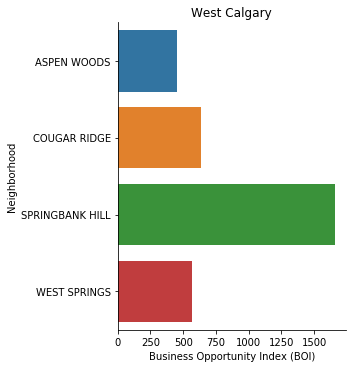

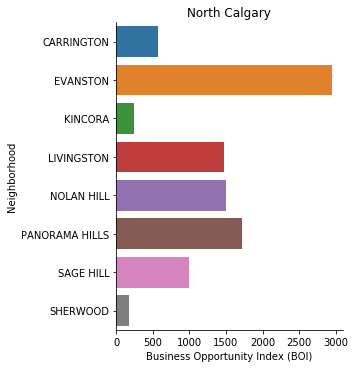

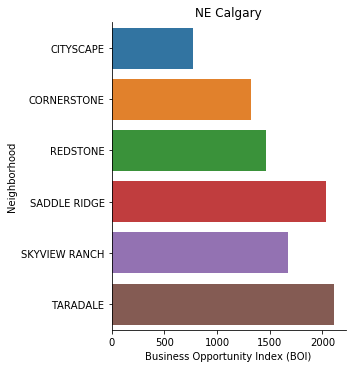

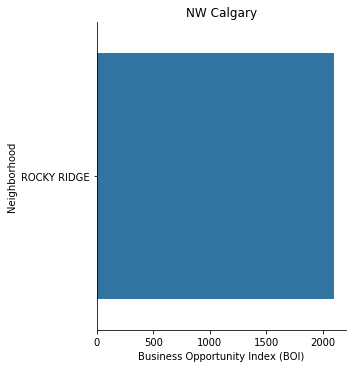

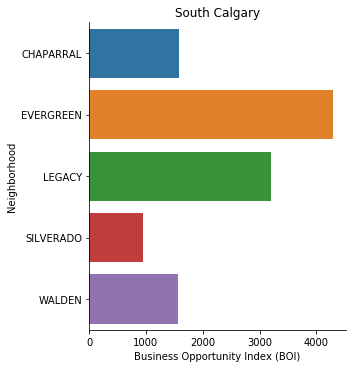

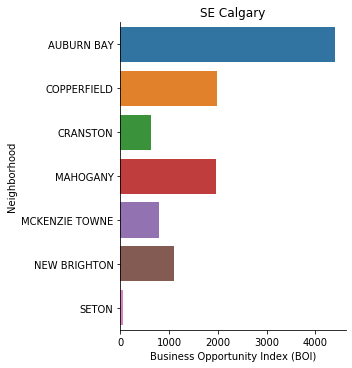

In [53]:
sns.catplot(x="Business Opportunity Index (BOI)", y="Neighborhood", kind="bar", data=calgary_west_bo)
plt.title('West Calgary')
plt.show()

sns.catplot(x="Business Opportunity Index (BOI)", y="Neighborhood", kind="bar", data=calgary_north_bo)
plt.title('North Calgary')
plt.show()

sns.catplot(x="Business Opportunity Index (BOI)", y="Neighborhood", kind="bar", data=calgary_ne_bo)
plt.title('NE Calgary')
plt.show()

sns.catplot(x="Business Opportunity Index (BOI)", y="Neighborhood", kind="bar", data=calgary_nw_bo)
plt.title('NW Calgary')
plt.show()

sns.catplot(x="Business Opportunity Index (BOI)", y="Neighborhood", kind="bar", data=calgary_south_bo)
plt.title('South Calgary')
plt.show()

sns.catplot(x="Business Opportunity Index (BOI)", y="Neighborhood", kind="bar", data=calgary_se_bo)
plt.title('SE Calgary')
plt.show()

In [54]:
print("West Calgary's Developing Neighborhoods have {} unique venues".format(len(calgary_dev_west_venues['Venue Category'].unique())))
print("North Calgary's Developing Neighborhoods have {} unique venues".format(len(calgary_dev_north_venues['Venue Category'].unique())))
print("Northeast Calgary's Developing Neighborhoods have {} unique venues".format(len(calgary_dev_ne_venues['Venue Category'].unique())))
print("Northwest Calgary's Developing Neighborhoods have {} unique venues".format(len(calgary_dev_nw_venues['Venue Category'].unique())))
print("South Calgary's Developing Neighborhoods have {} unique venues".format(len(calgary_dev_south_venues['Venue Category'].unique())))
print("Southeast Calgary's Developing Neighborhoods have {} unique venues".format(len(calgary_dev_se_venues['Venue Category'].unique())))

West Calgary's Developing Neighborhoods have 35 unique venues
North Calgary's Developing Neighborhoods have 56 unique venues
Northeast Calgary's Developing Neighborhoods have 22 unique venues
Northwest Calgary's Developing Neighborhoods have 4 unique venues
South Calgary's Developing Neighborhoods have 18 unique venues
Southeast Calgary's Developing Neighborhoods have 50 unique venues


<hr></hr>
Bar charts reveal that the <b>Southern part (South + SE)</b> of the city have the <b>highest BOI</b> within the range of <b>3000-4000 people-to-venue ratio</b> in communities suh as Auburn Bay (SE - BOI = 4000+), Evergreen (South - BOI = 4000+) and Legacy (South - BO = 3000). 

In the North, Evanston neighborhood came in second with BOI score = 3000, while other neighborhoods ranged up to 2000 taking into account the Northeast and Northwest sectors. 

Developing neighborhoods in the West came in last place of the priority table, with its highest scoring community (Springbank Hill) having a BOI = 2000.

Another interesting statistic to report is that collectively, the Northern sectors of the city have 20% more venues compared to their Southern counterparts. In particular, <b>South Calgary</b> has the <b>lowest number of 18 unique venues</b> compared to the rest of the sectors. 

Looking at this data, we will focus on <b>South Calgary</b> and carry it forward to the clustering stage using k-means algorithm since it represents the highest growth opportunity.

<h3>Analyze each Neighborhood</h3>

In [55]:
#Perform one-hot encoding to transform discrete variables to continuous variables to be properly handled in sci-kit learn ML library.
calgary_south_onehot = pd.get_dummies(calgary_dev_south_venues[['Venue Category']], prefix="", prefix_sep="")
calgary_south_onehot.head()
# add neighborhood column back to dataframe
calgary_south_onehot['Neighborhood'] = calgary_dev_south_venues['Neighborhood'] 
calgary_south_onehot.head()
# move neighborhood column to the first column
fixed_columns = [calgary_south_onehot.columns[-1]] + list(calgary_south_onehot.columns[:-1])
fixed_columns
calgary_south_onehot = calgary_south_onehot[fixed_columns]
calgary_south_onehot

,Neighborhood,Asian Restaurant,Bar,Coffee Shop,Construction & Landscaping,Cosmetics Shop,Dance Studio,Football Stadium,Gas Station,Golf Course,Grocery Store,Gym / Fitness Center,Ice Cream Shop,Liquor Store,Pharmacy,Pizza Place,Playground,Real Estate Office,Sushi Restaurant
0,EVERGREEN,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,EVERGREEN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,EVERGREEN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,EVERGREEN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,EVERGREEN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,CHAPARRAL,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,CHAPARRAL,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,CHAPARRAL,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8,CHAPARRAL,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,CHAPARRAL,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [56]:
# Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category.
calgary_south_grouped = calgary_south_onehot.groupby('Neighborhood').mean().reset_index()
calgary_south_grouped

,Neighborhood,Asian Restaurant,Bar,Coffee Shop,Construction & Landscaping,Cosmetics Shop,Dance Studio,Football Stadium,Gas Station,Golf Course,Grocery Store,Gym / Fitness Center,Ice Cream Shop,Liquor Store,Pharmacy,Pizza Place,Playground,Real Estate Office,Sushi Restaurant
0,CHAPARRAL,0.000,0.000,0.250,0.0,0.000,0.0,0.0,0.125,0.125,0.000,0.000,0.000,0.125,0.125,0.125,0.0,0.0,0.125
1,EVERGREEN,0.000,0.000,0.200,0.0,0.000,0.2,0.2,0.000,0.000,0.000,0.000,0.000,0.000,0.200,0.000,0.2,0.0,0.000
2,LEGACY,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.500,0.0,0.5,0.000
3,SILVERADO,0.125,0.125,0.125,0.0,0.125,0.0,0.0,0.000,0.000,0.125,0.125,0.125,0.125,0.000,0.000,0.0,0.0,0.000
4,WALDEN,0.000,0.000,0.000,0.5,0.000,0.0,0.0,0.250,0.000,0.000,0.000,0.000,0.000,0.250,0.000,0.0,0.0,0.000


Next, we will print each neighborhood along with the top 5 most common venues.

In [57]:
num_top_venues = 5

for hood in calgary_south_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = calgary_south_grouped[calgary_south_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:] #to help convert strings to float.
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----CHAPARRAL----
              venue  freq
0       Coffee Shop  0.25
1  Sushi Restaurant  0.12
2       Pizza Place  0.12
3          Pharmacy  0.12
4       Gas Station  0.12


----EVERGREEN----
              venue  freq
0       Coffee Shop   0.2
1        Playground   0.2
2      Dance Studio   0.2
3  Football Stadium   0.2
4          Pharmacy   0.2


----LEGACY----
                venue  freq
0  Real Estate Office   0.5
1         Pizza Place   0.5
2    Asian Restaurant   0.0
3                 Bar   0.0
4          Playground   0.0


----SILVERADO----
                  venue  freq
0      Asian Restaurant  0.12
1                   Bar  0.12
2          Liquor Store  0.12
3        Ice Cream Shop  0.12
4  Gym / Fitness Center  0.12


----WALDEN----
                        venue  freq
0  Construction & Landscaping  0.50
1                    Pharmacy  0.25
2                 Gas Station  0.25
3            Asian Restaurant  0.00
4        Gym / Fitness Center  0.00




In [58]:
# Let's add this into a Pandas dataframe
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [59]:
#Let's create the new dataframe and display the top 10 venues for each neighborhood.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = calgary_south_grouped['Neighborhood']

for ind in np.arange(calgary_south_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(calgary_south_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,CHAPARRAL,Coffee Shop,Sushi Restaurant,Liquor Store,Gas Station,Golf Course,Pharmacy,Pizza Place,Ice Cream Shop,Gym / Fitness Center,Grocery Store
1,EVERGREEN,Playground,Pharmacy,Coffee Shop,Dance Studio,Football Stadium,Sushi Restaurant,Gas Station,Bar,Construction & Landscaping,Cosmetics Shop
2,LEGACY,Pizza Place,Real Estate Office,Sushi Restaurant,Gas Station,Bar,Coffee Shop,Construction & Landscaping,Cosmetics Shop,Dance Studio,Football Stadium
3,SILVERADO,Asian Restaurant,Bar,Coffee Shop,Liquor Store,Ice Cream Shop,Gym / Fitness Center,Grocery Store,Cosmetics Shop,Football Stadium,Construction & Landscaping
4,WALDEN,Construction & Landscaping,Gas Station,Pharmacy,Sushi Restaurant,Bar,Coffee Shop,Cosmetics Shop,Dance Studio,Football Stadium,Golf Course


<hr></hr>
At this point, it is useful to provide some background information on K-Means Clustering algorithm to better understand how it segments the data <b>[3]</b>.

It is a partitioning-type of clustering method, where it divides the data into non-overlapping subsets (or clusters) without any cluster-internal structure. 

* Examples within a cluster are very similar
* Examples across different clusters are very different.

The algorithm works as follows:

<ol>1) Initialize K (number of centriods for each cluster) randomly (e.g. 3 Clusters).</ol>
<ol>2) Calculate the <a href=https://en.wikipedia.org/wiki/Euclidean_distance>Euclidean Distance</a> of all data points to the random centroids.</ol> 
<ol>3) Assign each point to the closest centroid, calculate the <a href=https://en.wikipedia.org/wiki/Residual_sum_of_squares>Residual Sum of Squares (RSS)</a> between each point and its centroid.</ol>
<ol>4) Compute new centroids for each cluster. The new location of centroids will be the new mean of data points in its cluster.</ol>
<ol>5) Re-calculate Euclidean distance of all data points to the new centroids.</ol>
<ol>6) Repeat steps 1 - 5 until centroids no longer move (i.e. when the least RSS or most dense clusters are obtained).</ol>

It is vastly used in Data Science applications, especially useful to quickly discover insights from unlabelled data.

Some real-world applications of K-Means Clustering incude:

* Customer Segmentation
* Pattern Recognition
* Understand what visitors of a website are trying to accomplish
* Machine Learning
* Data Compression

<b>[3]</b> - [IBM Coursera - K-Means Clustering Video](https://www.coursera.org/learn/applied-data-science-capstone/lecture/jpedY/k-means-clustering)
<hr></hr>

Before we proceed to clustering, let's check the optimum number of clusters (K) for our problem.

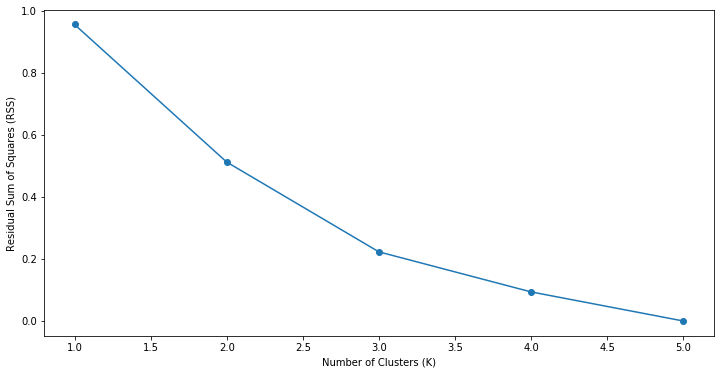

In [60]:
calgary_south_grouped_clustering = calgary_south_grouped.drop('Neighborhood', 1)

sse = []
list_k = list(range(1, 6))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(calgary_south_grouped_clustering)
    sse.append(km.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Residual Sum of Squares (RSS)')
plt.show()

The Residual Sum of Squares (RSS) continues to decrease with increasing number of clusters. However, it does not significantly drop after k = 3. Therefore, we will segment our neighborhoods into 3 main clusters.  

In [61]:
#Set number of clusters
kclusters = 3

#Run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(calgary_south_grouped_clustering)

#Check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 2, 1, 0])

Let's create a new dataframe that includes the clusters as well as the top 10 venues for each neighborhood.

In [62]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

calgary_south_merged = calgary_df_dev_south

# merge calgary_south_merged_grouped with calgary_df_dev_south to add latitude/longitude for each neighborhood
calgary_south_merged = calgary_south_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

calgary_south_merged # check the last columns!
calgary_south_merged = calgary_south_merged.reset_index(drop=True)
calgary_south_merged

,Class,Neighborhood,Sector,Suburban Residential Growth,Census,Population,Dwellings,Total Male Residents,Total Female Residents,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Residential,EVERGREEN,SOUTH,DEVELOPING,2019,21500,7256,10530,10909,50.916379,-114.111578,1,Playground,Pharmacy,Coffee Shop,Dance Studio,Football Stadium,Sushi Restaurant,Gas Station,Bar,Construction & Landscaping,Cosmetics Shop
1,Residential,CHAPARRAL,SOUTH,DEVELOPING,2019,12654,4179,6284,6342,50.883594,-114.021265,1,Coffee Shop,Sushi Restaurant,Liquor Store,Gas Station,Golf Course,Pharmacy,Pizza Place,Ice Cream Shop,Gym / Fitness Center,Grocery Store
2,Residential,SILVERADO,SOUTH,DEVELOPING,2019,7655,2588,3792,3811,50.884366,-114.078035,1,Asian Restaurant,Bar,Coffee Shop,Liquor Store,Ice Cream Shop,Gym / Fitness Center,Grocery Store,Cosmetics Shop,Football Stadium,Construction & Landscaping
3,Residential,LEGACY,SOUTH,DEVELOPING,2019,6420,2766,3125,3283,50.856893,-114.002560,2,Pizza Place,Real Estate Office,Sushi Restaurant,Gas Station,Bar,Coffee Shop,Construction & Landscaping,Cosmetics Shop,Dance Studio,Football Stadium
4,Residential,WALDEN,SOUTH,DEVELOPING,2019,6228,2421,2986,3208,50.869568,-114.018688,0,Construction & Landscaping,Gas Station,Pharmacy,Sushi Restaurant,Bar,Coffee Shop,Cosmetics Shop,Dance Studio,Football Stadium,Golf Course


<h3>Visualize Resulting Clusters using Folium</h3>

In [63]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(calgary_south_merged['Latitude'], calgary_south_merged['Longitude'], 
                                  calgary_south_merged['Neighborhood'], calgary_south_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters
Now, each cluster will be examined to determine the discriminating venue categories that distinguish each cluster. This will be done using <b>wordcloud</b> library. `Word` clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud. This Python package was developed by <b>Andreas Mueller</b>. You can learn more about the package by following this [link](https://github.com/amueller/word_cloud/).

In [64]:
stopwords = set(STOPWORDS)
cloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

In [65]:
def get_cluster_word_cloud(cluster_df,cols):
    cluster_txt = []
    for i in range(4,cols+4):
        cluster_txt = cluster_txt + cluster_df.iloc[:, i].tolist()
    txt = ' '
    for s in cluster_txt:
        txt = txt + ' ' + str(s).replace(' ','')
    cloud.generate(txt)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

<h3>Cluster 1 [Neighborhood(s) = Walden]</h3>

In [66]:
cluster_1 = calgary_south_merged.loc[calgary_south_merged['Cluster Labels'] == 0, calgary_south_merged.columns[[1] + list(range(5, calgary_south_merged.shape[1]))]]
cluster_1

,Neighborhood,Population,Dwellings,Total Male Residents,Total Female Residents,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,WALDEN,6228,2421,2986,3208,50.869568,-114.018688,0,Construction & Landscaping,Gas Station,Pharmacy,Sushi Restaurant,Bar,Coffee Shop,Cosmetics Shop,Dance Studio,Football Stadium,Golf Course


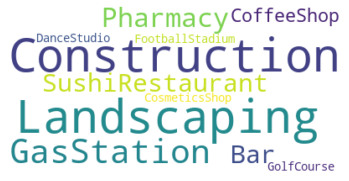

In [67]:
get_cluster_word_cloud(cluster_1,14) #list most common avenues in Cluster 1

<h3>Cluster 2 [Neighborhood(s) = Evergreen, Chaparral and Silverado]</h3>

In [68]:
cluster_2 = calgary_south_merged.loc[calgary_south_merged['Cluster Labels'] == 1, calgary_south_merged.columns[[1] + list(range(5, calgary_south_merged.shape[1]))]]
cluster_2

,Neighborhood,Population,Dwellings,Total Male Residents,Total Female Residents,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,EVERGREEN,21500,7256,10530,10909,50.916379,-114.111578,1,Playground,Pharmacy,Coffee Shop,Dance Studio,Football Stadium,Sushi Restaurant,Gas Station,Bar,Construction & Landscaping,Cosmetics Shop
1,CHAPARRAL,12654,4179,6284,6342,50.883594,-114.021265,1,Coffee Shop,Sushi Restaurant,Liquor Store,Gas Station,Golf Course,Pharmacy,Pizza Place,Ice Cream Shop,Gym / Fitness Center,Grocery Store
2,SILVERADO,7655,2588,3792,3811,50.884366,-114.078035,1,Asian Restaurant,Bar,Coffee Shop,Liquor Store,Ice Cream Shop,Gym / Fitness Center,Grocery Store,Cosmetics Shop,Football Stadium,Construction & Landscaping


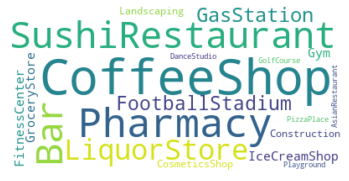

In [72]:
get_cluster_word_cloud(cluster_2,14) #list most common avenues in Cluster 2

<h3>Cluster 3 [Neighborhood(s) = Legacy]</h3>

In [70]:
cluster_3 = calgary_south_merged.loc[calgary_south_merged['Cluster Labels'] == 2, calgary_south_merged.columns[[1] + list(range(5, calgary_south_merged.shape[1]))]]
cluster_3

,Neighborhood,Population,Dwellings,Total Male Residents,Total Female Residents,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,LEGACY,6420,2766,3125,3283,50.856893,-114.00256,2,Pizza Place,Real Estate Office,Sushi Restaurant,Gas Station,Bar,Coffee Shop,Construction & Landscaping,Cosmetics Shop,Dance Studio,Football Stadium


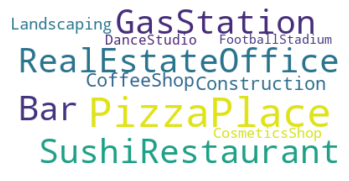

In [71]:
get_cluster_word_cloud(cluster_3,14) #list most common avenues in Cluster 3

## Results and Discussion <a name="results"></a>

The comprehensive analysis demonstrated that, in general, the South sector of Calgary offers tremendous opportunities for future Entrepreneurs to start their business. Based on the factors listed in the Methodology section, calculated BOI and clusters generated, <b>Evergreen in Cluster 2 (BOI Score = 4300 people-to-venue ratio)</b> and <b>Legacy in Cluster 3 (BOI Score = 3210 people-to-venue ratio)</b> stand out as the most potential neighborhoods to be targetted by aspiring Business owners.

In addition, both of these neighborhoods have easy access to public transit and contain free parking space, deeming them favorable to attract as many visitors as possible. One down-side is long commuting time for people who live in city center or other sectors in the city. With that said, such drawback is evident in every major city in the world.

The two neighborhoods selected offer unlimited possibilities for the types of businesses to be considered that can cater for diverse types of customer-base. The below tables shed some light on some suggestions.

<div align="center"><b align="center">Evergreen (Cluster 2)</b></div>

|Business Category|Examples  |
-------------:| ----------------:|
 Restaurant | Pizza, Italian, Indian, Asian, Middle-Eastern  |
 Dessert     | Ice Cream Shop |
 Supermarket | Grocery Store |
 Health and Beauty  | Cosmetics Shop<b>**</b> |
 Recreation  | Gym/Fitness Center |
 Industrial  | Construction & Landscaping, Real Estate Office |

<b>**</b> 50% of neighborhood residents are Female.


<div align="center"><b align="center">Legacy (Cluster 3)</b></div>

|Business Category|Examples  |
-------------:| ----------------:|
 Restaurant | Italian, Indian, Asian, Middle-Eastern  |
 Dessert     | Ice Cream Shop, Coffee Shop |
 Supermarket | Grocery Store |
 Health and Beauty  | Cosmetics Shop<b>**</b> |
 Recreation  | Gym/Fitness Center, Dance Studio |
 Industrial  | Construction & Landscaping |

<b>**</b> 50% of neighborhood residents are Female.

## Conclusion <a name="conclusion"></a>

This study provided alot of insight into what Calgary, AB has to offer to Investors and Entrepreneurs. There are a total of 199 effectively populated neighborhoods, classified into <b>31 developing</b> and <b>168 built-out</b> communities as of the latest Census data collected by the City of Calgary council in Dec 2019. We focused on developing communities as they have better potential to grow in the future and thus are prime targets for Business owners.

Moreover, it will also be less capital-intensive since property developers will be in need of new business owners to establish the commercial footprint in such neighborhoods. This will lead to providing incentives that are otherwise non-existent in saturated neighborhoods.

Statistical analysis identified <b>South Calgary</b> as the most favorable target, since it ranked first in terms of the calculated Business Opportunity Index (BOI) and contains the least number of only 18 unique venues.

From the neighborhoods in the South, Evergreen and Legacy contained within Clusters 2 and 3, respectively showed the most potential. A list of possible business types were also identified in the <b>Results and Discussion</b> section of this study.

The model used in this study is highly flexible. It can be used to investigate other neighborhoods located in different sectors based on their calculated BOI. Therefore, it can serve all types of potential business owners and City officials to help them pin-point opportunities for Economic growth and prosperity.

The following two sources provide the latest updates on Development projects in both neighborhoods:

<b>[4]</b> - [Evergreen.ca](https://www.evergreen.ca/)

<b>[5]</b> - [Legacylife.ca](https://legacylife.ca/)

<b>Future work to be considered:</b>

* Optimum location to open a Daycare Center (Data about number of children per house-hold in each neighborhood is available)

* Optimum location to open a Pet Store (Data about number of pets per house-hold in each neighborhood is available) 

* Optimum location to open a Senior Home (Data about Residents age demographics in each neighborhood is available)